In [1]:
%matplotlib inline
%load_ext autoreload

In [2]:
import os
os.chdir('/home/jaentrouble/adipose_train2')
print(os.getcwd())

/home/jaentrouble/adipose_train2


In [3]:
!git pull
%autoreload

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (2/2), done.
Unpacking objects:  80% (4/5)remote: Total 5 (delta 3), reused 5 (delta 3), pack-reused 0
Unpacking objects: 100% (5/5), 633.18 KiB | 788.00 KiB/s, done.
From https://github.com/jaentrouble/Adipos_tf_train2
   354b631..a3beb95  master     -> origin/master
Updating 354b631..a3beb95
Fast-forward
 model_trainer.py  |  2 ++
 train_model.ipynb | 44 ++++++++++++++++++++++----------------------
 view_result.ipynb | 32 ++++++++++++++++----------------
 3 files changed, 40 insertions(+), 38 deletions(-)


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
with np.load('cell_mask_data.npz') as data:
    X = data['img']
    Y = data['mask']
print('X shape: ', X.shape, X.dtype)
print('Y shape: ', Y.shape, Y.dtype)

X shape:  (1533, 200, 200, 3) uint8
Y shape:  (1533, 200, 200) float32


In [6]:
X_test = X[1350:]
Y_test = Y[1350:]
X_train_small = X[:100]
Y_train_small = Y[:100]

In [7]:
import tensorflow as tf
from model_trainer import get_model
from adipose_models import *

In [8]:
model_f = conv4_b2_0
savedfile_name = 'conv4_b2_0'
target_epoch = 10

In [9]:
test_model = get_model(conv4_b2_0)
test_model.load_weights('savedmodels/'+savedfile_name+'/'+str(target_epoch))

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: GeForce RTX 2070 SUPER, compute capability 7.5
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 32)      9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 200, 200, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 200, 200, 32)      9248      
____________

In [10]:
test_model.evaluate(X_train_small, Y_train_small)

4/4 [==============================] - 0s 21ms/step - loss: 0.7016 - binary_accuracy: 0.7179


[0.7015557289123535, 0.7179164886474609]

In [11]:
predict = test_model(X_train_small)
print(predict.shape)

(100, 200, 200)


In [12]:
import random

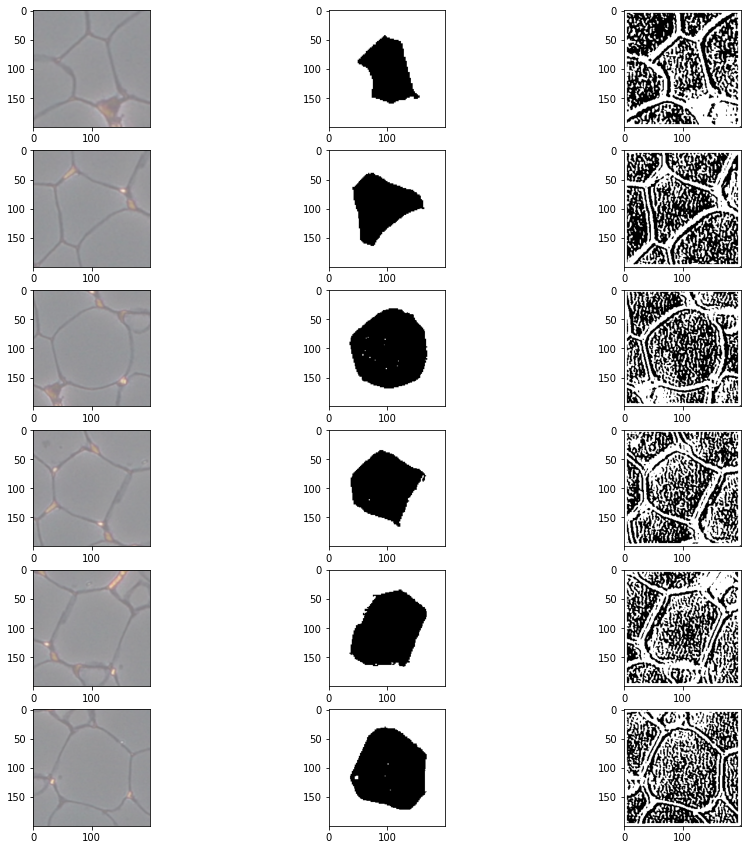

In [13]:
fig = plt.figure(figsize=(15,15))
i = 1
n = 6
r = random.randrange(0,predict.shape[0]-n)
for img, mask, pred in zip(X_train_small[r:r+n], Y_train_small[r:r+n], predict[r:r+n]):
    ax = fig.add_subplot(n,3,i)
    ax.imshow(img)
    ax = fig.add_subplot(n,3,i+1)
    ax.imshow(mask, cmap='binary')
    ax = fig.add_subplot(n,3,i+2)
    ax.imshow(pred>0.05, cmap='binary')
    i += 3
plt.show()